<a href="https://colab.research.google.com/github/aaryansky/Hand-Gesture-Recoginition-Using-CNN-/blob/main/Copy_of_hand_gesture_recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


File loaded successfully, skipping bad lines if any.
   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001    0.0    1.0  
1  -0.00001    0.0    1.0  
2   0.00001    0.0    1.0  
3   0.00001    0.0    1.0  
4   0.00001    0.0    1.0  
Index(['time', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5',
       'channel6', 'channel7', 'channel8', 'class', 'label'],
      dtype='object')
Accuracy: 0.959315082806541
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95   

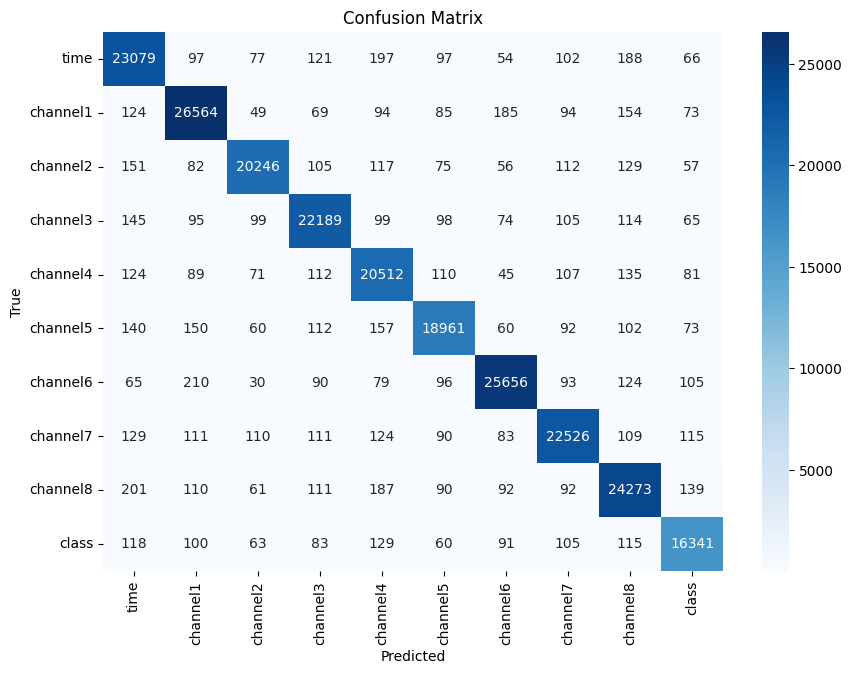

F1 Score: 0.9593249667376068
Recall (Sensitivity): 0.959315082806541
Specificity per class: [0.9941784119758382, 0.9948368207872365, 0.997027262876267, 0.995576184967741, 0.9943208548961624, 0.9961818051814954, 0.9963572638128618, 0.9956252667520273, 0.9942741367159972, 0.9963574242188934]
Average Specificity: 0.9954735432184518


In [ ]:
import pandas as pd
import numpy as np # Import NumPy

# Load the dataset, handling potential errors
file_path = "/content/EMG-data[1].csv" # Adjust the path as necessary
try:
    data = pd.read_csv(file_path, on_bad_lines='skip')  # Skip problematic lines using 'on_bad_lines'
    print("File loaded successfully, skipping bad lines if any.")
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")
    # Further investigation needed, potentially inspect the problematic lines

# Display the first few rows and the column names
print(data.head())
print(data.columns)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Handle non-numeric values in 'y' (replace '-' and similar patterns with NaN and then fill with the mean or mode)
y = pd.Series(y).replace(regex=r'^-.*', value=pd.NA).astype(float)
# Fill missing values with the mode (most frequent value) for classification tasks
y = y.fillna(y.mode()[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle non-numeric values (replace '-' and similar patterns with NaN and then fill with the mean)
X_train = pd.DataFrame(X_train).replace(regex=r'^-.*$', value=pd.NA).astype(float).fillna(pd.DataFrame(X_train).replace(regex=r'^-.*$', value=pd.NA).astype(float).mean()).values
X_test = pd.DataFrame(X_test).replace(regex=r'^-.*$', value=pd.NA).astype(float).fillna(pd.DataFrame(X_test).replace(regex=r'^-.*$', value=pd.NA).astype(float).mean()).values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=data.columns[:-1], yticklabels=data.columns[:-1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import f1_score, recall_score

# Assuming y_test and y_pred contain class labels (not probabilities)
y_test_classes = y_test  # If y_test already contains class labels, no change needed
y_pred_classes = y_pred  # If y_pred already contains class labels, no change needed

# Calculate F1 Score and Recall (Sensitivity)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')

# Calculate Specificity for each class
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    FP = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity = TN / (TN + FP)
    specificity_per_class.append(specificity)

# Calculate average specificity
average_specificity = np.mean(specificity_per_class)

print("F1 Score:", f1)
print("Recall (Sensitivity):", recall)
print("Specificity per class:", specificity_per_class)
print("Average Specificity:", average_specificity)


In [ ]:
data = pd.read_csv('/content/emg_signal_data.csv')
data.info()

<ipython-input-29-1fb2f38dfe53>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/emg_signal_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933182 entries, 0 to 1933181
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  object 
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     float64
 10  label     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 162.2+ MB


In [ ]:
data.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1.0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1.0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0


In [ ]:
data.shape

(1933182, 11)

In [ ]:
print(data.isna().sum())

time        0
channel1    0
channel2    0
channel3    0
channel4    1
channel5    1
channel6    1
channel7    1
channel8    1
class       1
label       1
dtype: int64


In [ ]:
print((data == 0).sum())


time              0
channel1     243270
channel2     208913
channel3     163263
channel4     140462
channel5     135961
channel6     180376
channel7     235027
channel8     250943
class       1246294
label             0
dtype: int64


In [ ]:
# Convert non-numeric data to NaNs
data['channel3'] = pd.to_numeric(data['channel3'], errors='coerce')

# Remove rows with NaN values
data = data.dropna()

# Convert all columns to numeric, forcing non-convertible to NaNs
data = data.apply(pd.to_numeric, errors='coerce')

# Check the info of the cleaned data
print("\nInfo about the cleaned dataset:")
print(data.info())



Info about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1933181 entries, 0 to 1933180
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     float64
 10  label     float64
dtypes: float64(10), int64(1)
memory usage: 177.0 MB
None


In [ ]:
# Remove rows with zero values
data_no_zeros = data[(data != 0).all(axis=1)]

# Check the shape after removing zero values
print("\nShape after removing zero values:")
print(data_no_zeros.shape)



Shape after removing zero values:
(432918, 11)


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(data_no_zeros.describe())



Summary statistics:
                time       channel1       channel2       channel3  \
count  432918.000000  432918.000000  432918.000000  432918.000000   
mean    32885.335805      -0.000010      -0.000012      -0.000012   
std     18497.076377       0.000224       0.000174       0.000167   
min         1.000000      -0.001280      -0.001280      -0.001280   
25%     17280.000000      -0.000080      -0.000060      -0.000070   
50%     32399.000000      -0.000010      -0.000020      -0.000020   
75%     47524.000000       0.000060       0.000040       0.000050   
max     76979.000000       0.001270       0.001270       0.001270   

            channel4       channel5       channel6       channel7  \
count  432918.000000  432918.000000  432918.000000  432918.000000   
mean       -0.000011      -0.000021      -0.000017      -0.000012   
std         0.000299       0.000354       0.000288       0.000199   
min        -0.001280      -0.001280      -0.001280      -0.001280   
25%        -

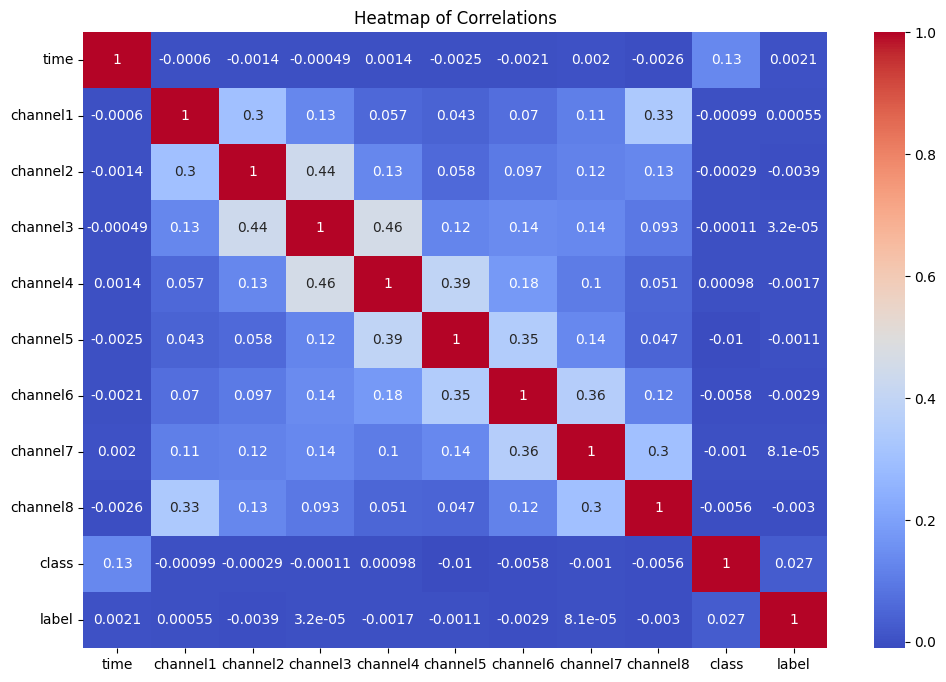

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlations")
plt.show()


Columns to be plotted: ['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']


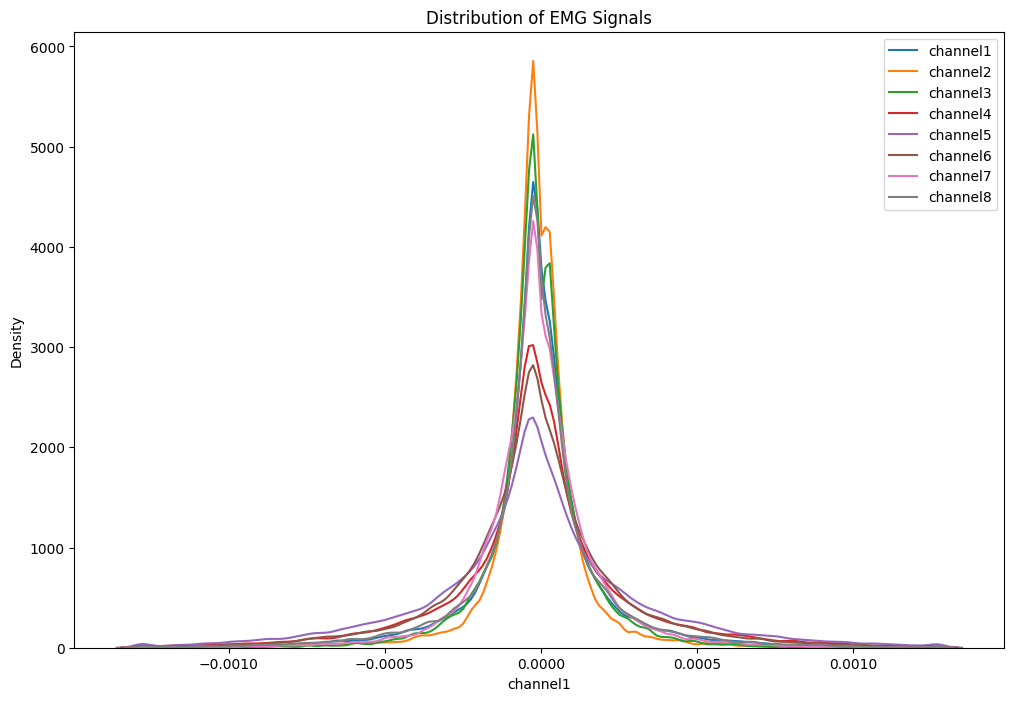

In [ ]:
print("Columns to be plotted:", data_no_zeros.columns[1:-2].tolist())

# Plot distribution of EMG signals
plt.figure(figsize=(12, 8))
for column in data_no_zeros.columns[1:-2]:
    if data_no_zeros[column].notnull().sum() > 0:
        sns.kdeplot(data_no_zeros[column], label=column)
    else:
        print(f"Column {column} is empty or has no valid data.")
plt.title("Distribution of EMG Signals")
plt.legend()
plt.show()



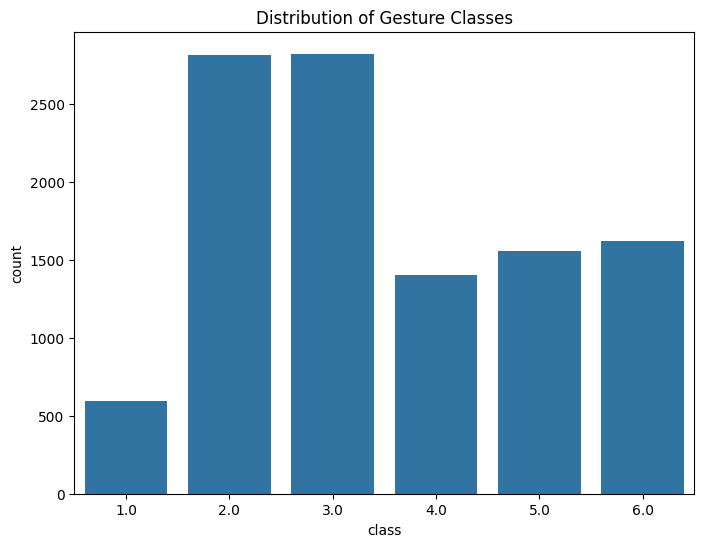

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data_no_zeros)
plt.title("Distribution of Gesture Classes")
plt.show()


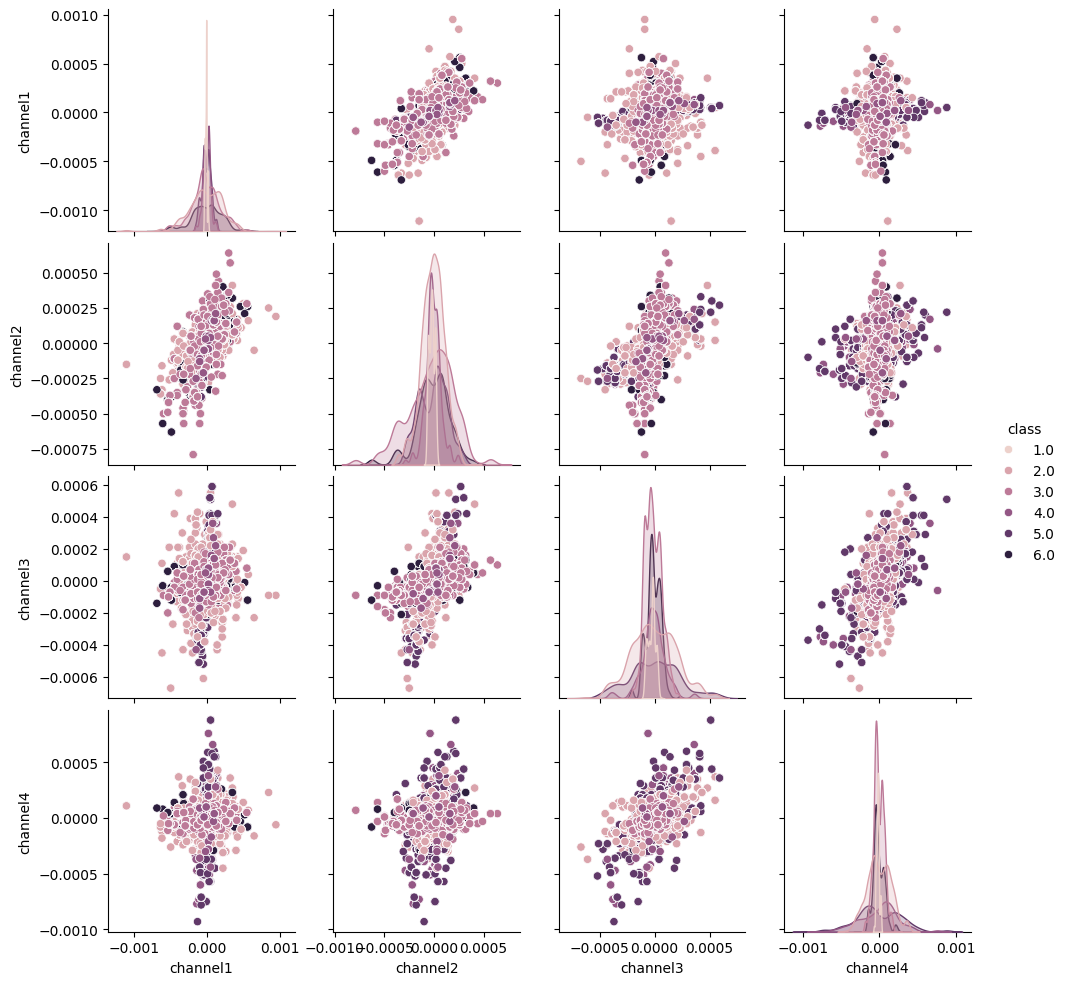

In [ ]:
subset_features = data_no_zeros.columns[1:5].tolist() + ['class']
sns.pairplot(data_no_zeros[subset_features], hue='class')
plt.show()

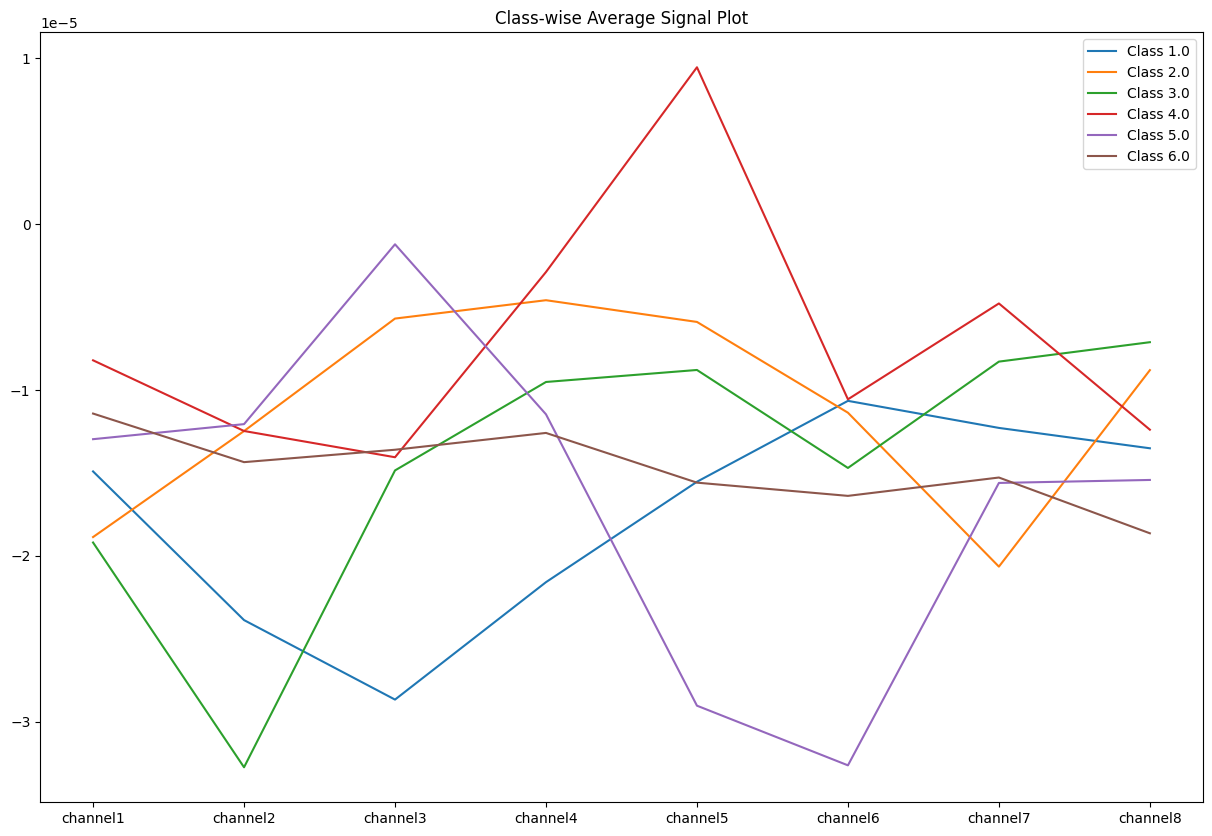

In [ ]:
# Class-wise Signal Plot
unique_classes = data_no_zeros['class'].unique()
plt.figure(figsize=(15, 10))
for cls in unique_classes:
    subset = data_no_zeros[data_no_zeros['class'] == cls]
    plt.plot(subset.drop(['time', 'class', 'label'], axis=1).mean(), label=f'Class {cls}')
plt.title("Class-wise Average Signal Plot")
plt.legend()
plt.show()


<ipython-input-20-572a1240deb2>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/emg_signal_data.csv')


Class distribution in the training set:
class
2.0    3121
5.0    2957
3.0    2897
6.0    2846
4.0    2570
1.0     627
Name: count, dtype: int64

Class distribution in the testing set:
class
2.0    1337
5.0    1268
3.0    1242
6.0    1220
4.0    1101
1.0     269
Name: count, dtype: int64

Class distribution in the resampled training set:
class
4.0    3121
6.0    3121
3.0    3121
5.0    3121
2.0    3121
1.0    3121
Name: count, dtype: int64

Confusion Matrix:
[[ 268    0    0    1    0    0]
 [   0 1329    0    1    2    5]
 [   0    4 1223    2    0   13]
 [   0    1    0 1087   13    0]
 [   0    5    0   13 1246    4]
 [   0   13   10    4    1 1192]]


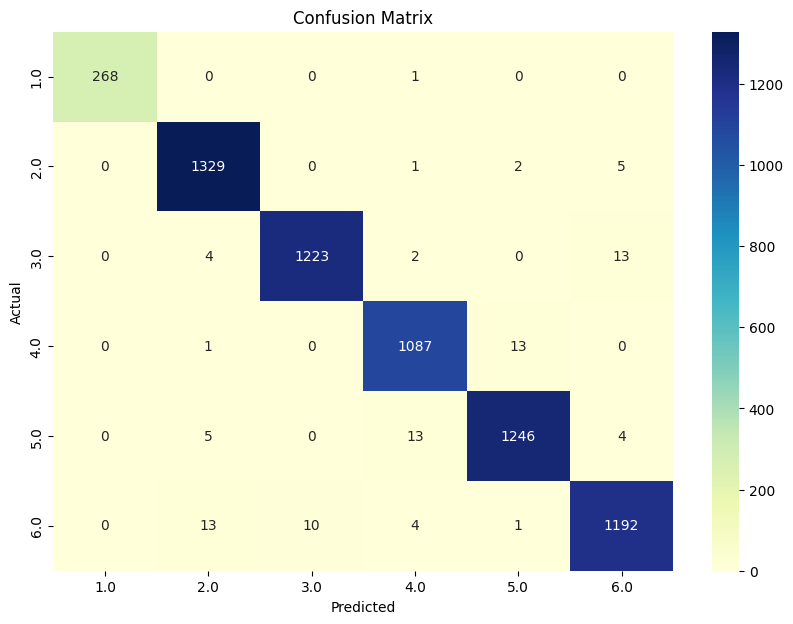


Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       269
         2.0       0.98      0.99      0.99      1337
         3.0       0.99      0.98      0.99      1242
         4.0       0.98      0.99      0.98      1101
         5.0       0.99      0.98      0.98      1268
         6.0       0.98      0.98      0.98      1220

    accuracy                           0.99      6437
   macro avg       0.99      0.99      0.99      6437
weighted avg       0.99      0.99      0.99      6437


Accuracy Score:
0.9857076277769147


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/emg_signal_data.csv')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Verify the class distribution in the training and testing sets
print("Class distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the testing set:")
print(y_test.value_counts())

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify class distribution in the resampled training set
print("\nClass distribution in the resampled training set:")
print(y_train_resampled.value_counts())

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on the resampled training set
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



In [ ]:
from sklearn.metrics import  f1_score, recall_score

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate specificity
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
specificity = TN / (TN + FP)

print("F1 Score:", f1)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)

F1 Score: 0.9857047652190144
Recall (Sensitivity): 0.9857076277769147
Specificity: 1.0
